<a href="https://colab.research.google.com/github/PhaTanVu/AI_W8_24-03-2023/blob/main/bt_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas

url = '/content/lung_cancer_examples.csv'
data= pd.read_csv(url)
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


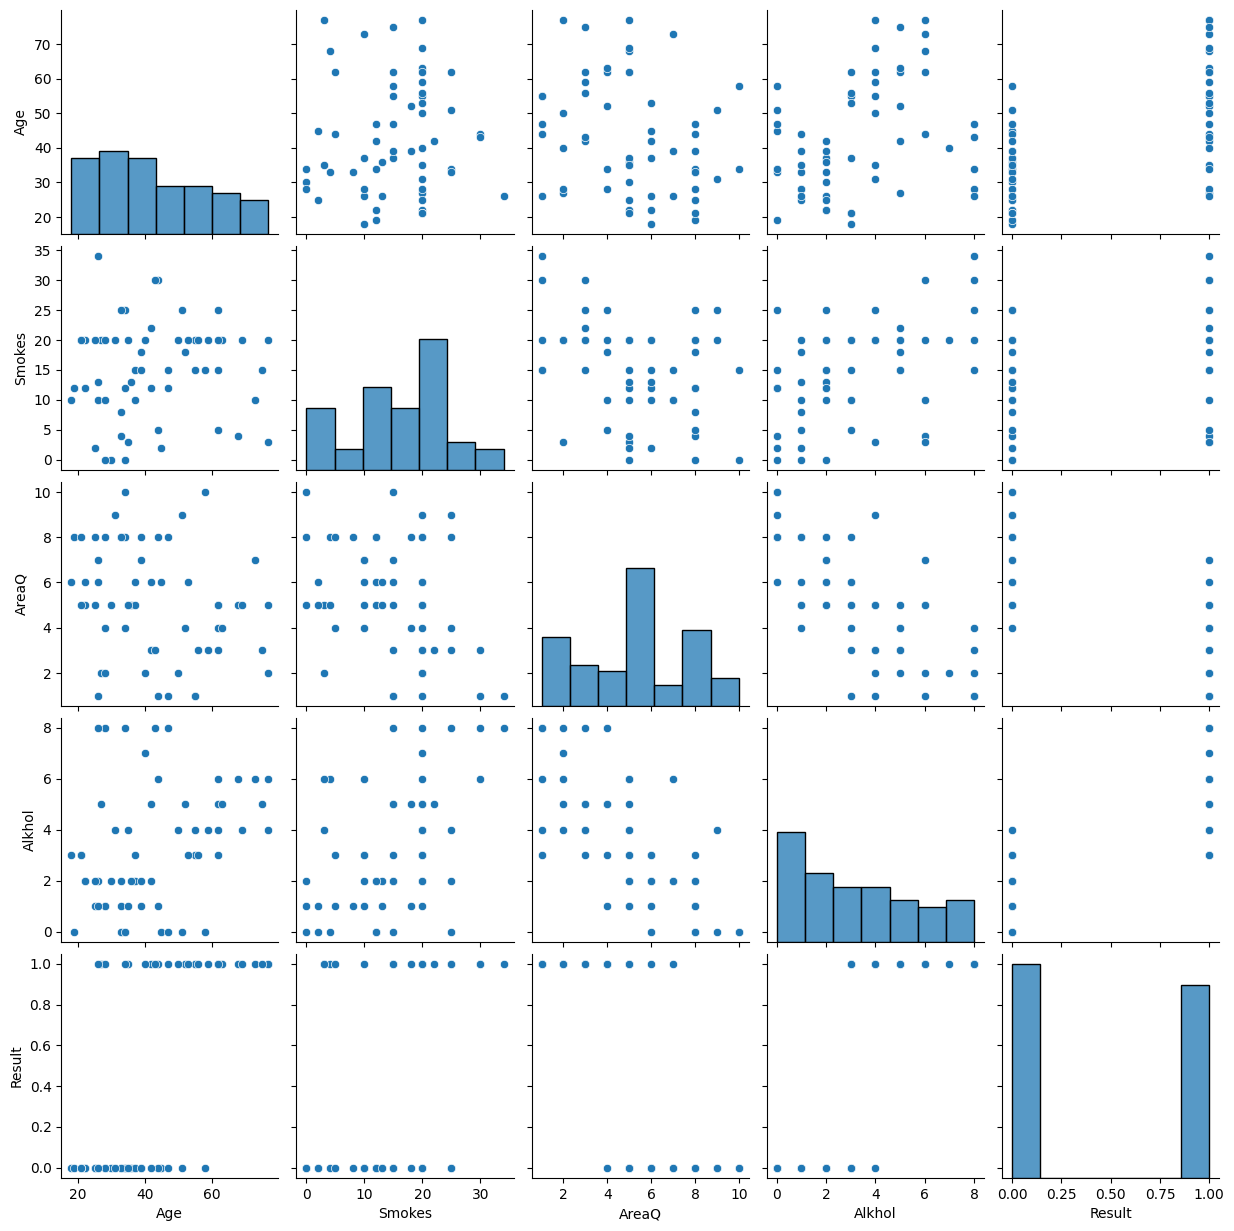

In [2]:
sas.pairplot(data)

<Axes: >

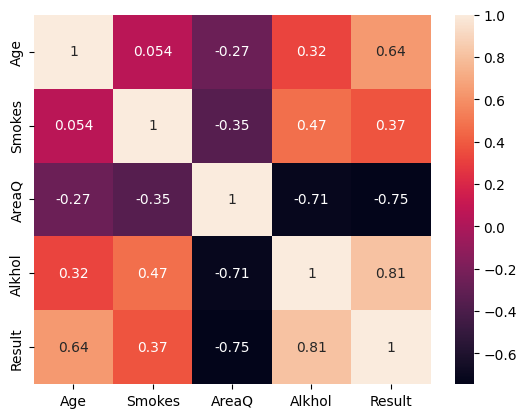

In [3]:
#Moi lien quan giua cac dai luong
corr = data.corr()
sas.heatmap(corr, annot= True)

In [4]:
x = data.drop(['Name','Surname','Result'], axis = 1)
print(x[:5])

   Age  Smokes  AreaQ  Alkhol
0   35       3      5       4
1   27      20      2       5
2   30       0      5       2
3   28       0      8       1
4   68       4      5       6


In [5]:
y = data.drop(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Name', 'Surname'], axis=1)
print(y[:5])

   Result
0       1
1       1
2       0
3       0
4       1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
print(x_train_std[:5])
print(y.T)

[[-0.45824418  1.32580567 -0.64660557  2.16837148]
 [ 0.08897945  1.96231659 -1.07419957  2.16837148]
 [-0.64065206  0.68929475  1.49136445  0.4336743 ]
 [-1.43108619 -0.58372709  0.20858244  0.        ]
 [-0.70145468 -1.85674893 -0.21901156 -0.4336743 ]]
        0   1   2   3   4   5   6   7   8   9   ...  49  50  51  52  53  54  \
Result   1   1   0   0   1   0   0   0   0   1  ...   1   0   1   1   0   0   

        55  56  57  58  
Result   1   1   1   0  

[1 rows x 59 columns]


In [7]:

model = Perceptron(max_iter = 200, eta0= 0.13 , random_state = 0) 
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
print(y_pred[:10])
print(y_test[:10].T)
print("Do chinh xac:", accuracy_score(y_test, y_pred))

[1 0 1 1 1 0 1 0 1 0]
        49  34  20  18  13  50  16  44  48  6 
Result   1   0   1   1   1   0   1   0   1   0
Do chinh xac: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
